# Source

In [2]:
# https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial

# Import libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sympy import symbols, Eq
from scipy.stats import boxcox

# Configure plot

In [4]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-v0_8-pastel')

# Import dataset

In [5]:
path = './datasets/'
df = pd.read_csv(path+'insurance.csv')

In [6]:
# Shape of dataset (1338, 7)
print('Number of rows and columns in this dataset: ', df.shape)

# First 5 rows of insurance.csv
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

Number of rows and columns in this dataset:  (1338, 7)
+----+-------+--------+--------+------------+----------+-----------+-----------+
|    |   age | sex    |    bmi |   children | smoker   | region    |   charges |
|----+-------+--------+--------+------------+----------+-----------+-----------|
|  0 |    19 | female | 27.9   |          0 | yes      | southwest |  16884.9  |
|  1 |    18 | male   | 33.77  |          1 | no       | southeast |   1725.55 |
|  2 |    28 | male   | 33     |          3 | no       | southeast |   4449.46 |
|  3 |    33 | male   | 22.705 |          0 | no       | northwest |  21984.5  |
|  4 |    32 | male   | 28.88  |          0 | no       | northwest |   3866.86 |
+----+-------+--------+--------+------------+----------+-----------+-----------+


### Dependent (target) variable in this case is charges.
### Independent variables are: age, sex, bmi, children, smoker, and region.

# The Linear Regression Equation

$$
h_{\theta}(x_i) = \theta_0 + \theta_1 \cdot \text{age} + \theta_2 \cdot \text{sex} + \theta_3 \cdot \text{bmi} + \theta_4 \cdot \text{children} + \theta_5 \cdot \text{smoker} + \theta_6 \cdot \text{region}
$$

# Charge vs. BMI

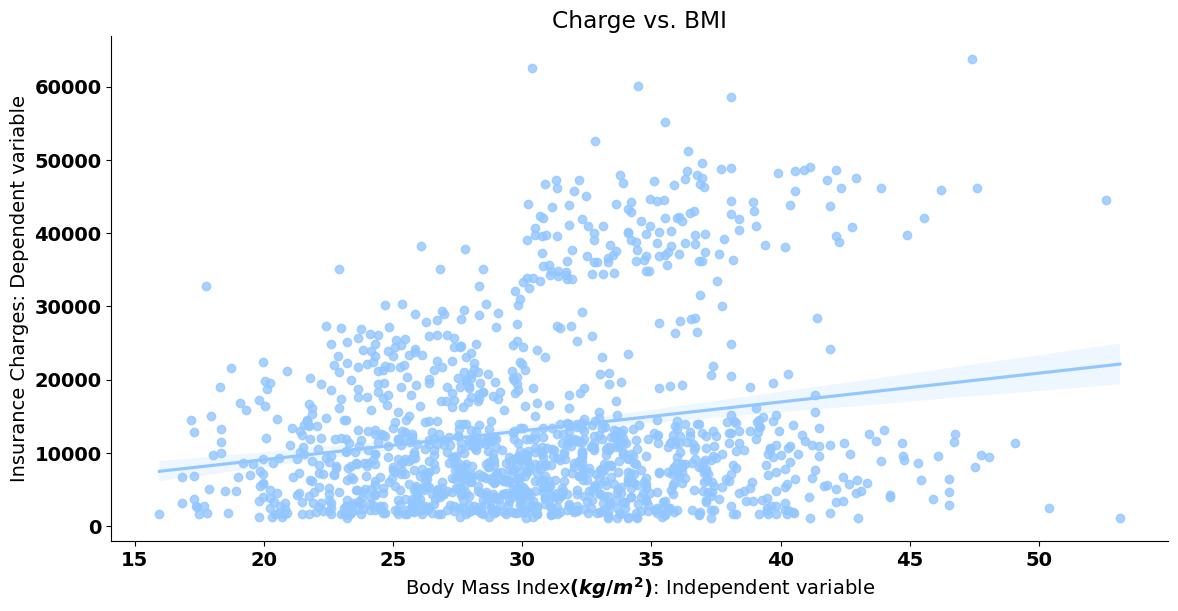

In [7]:
sns.lmplot(x='bmi', y='charges', data=df, aspect=2, height=6)
plt.xlabel('Body Mass Index$(kg/m^2)$: Independent variable')
plt.ylabel('Insurance Charges: Dependent variable')
plt.title('Charge vs. BMI')
plt.show()

# Exploratory Data Analysis

## Summary of data

In [8]:
print(tabulate(df.describe(), headers='keys', tablefmt='psql'))

+-------+----------+------------+------------+-----------+
|       |      age |        bmi |   children |   charges |
|-------+----------+------------+------------+-----------|
| count | 1338     | 1338       | 1338       |   1338    |
| mean  |   39.207 |   30.6634  |    1.09492 |  13270.4  |
| std   |   14.05  |    6.09819 |    1.20549 |  12110    |
| min   |   18     |   15.96    |    0       |   1121.87 |
| 25%   |   27     |   26.2963  |    0       |   4740.29 |
| 50%   |   39     |   30.4     |    1       |   9382.03 |
| 75%   |   51     |   34.6938  |    2       |  16639.9  |
| max   |   64     |   53.13    |    5       |  63770.4  |
+-------+----------+------------+------------+-----------+


## Check for missing values (none)

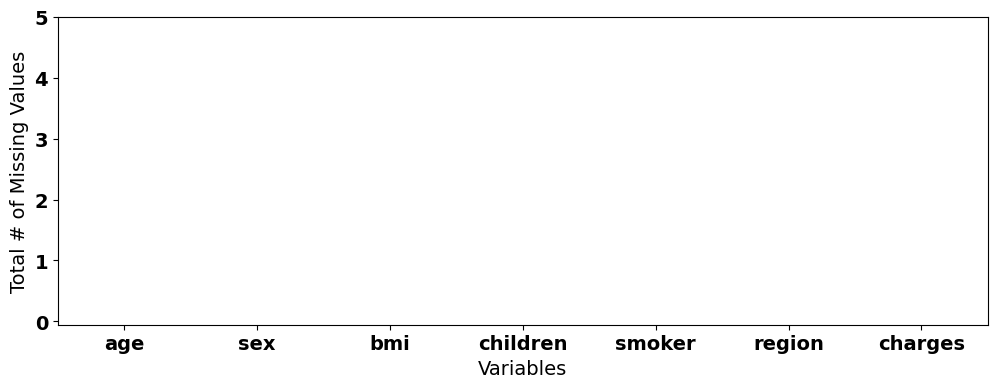

In [9]:
plt.figure(figsize=(12,4))
sns.barplot(df.isnull())
plt.xlabel('Variables')
plt.ylabel('Total # of Missing Values')
plt.yticks(range(0, 6, 1))
plt.show()

## Use one-hot encoding for correlation (convert categorical columns to numeric)

In [10]:
df_numeric = df.select_dtypes(include=[np.number])

## Display correlation between variables (little to none)

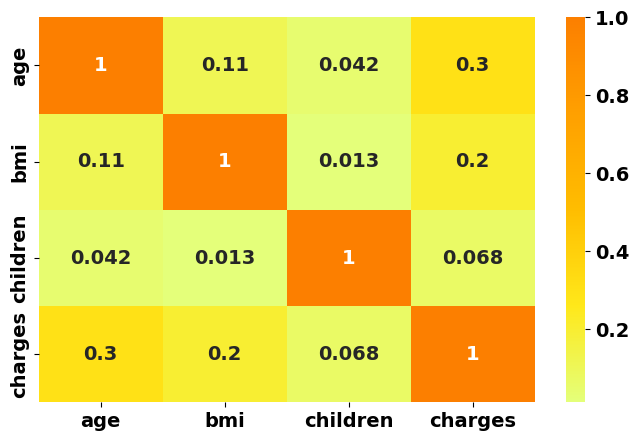

In [11]:
corr = df_numeric.corr()
sns.heatmap(corr, cmap='Wistia', annot=True)
plt.show()

## Charges vs. Children

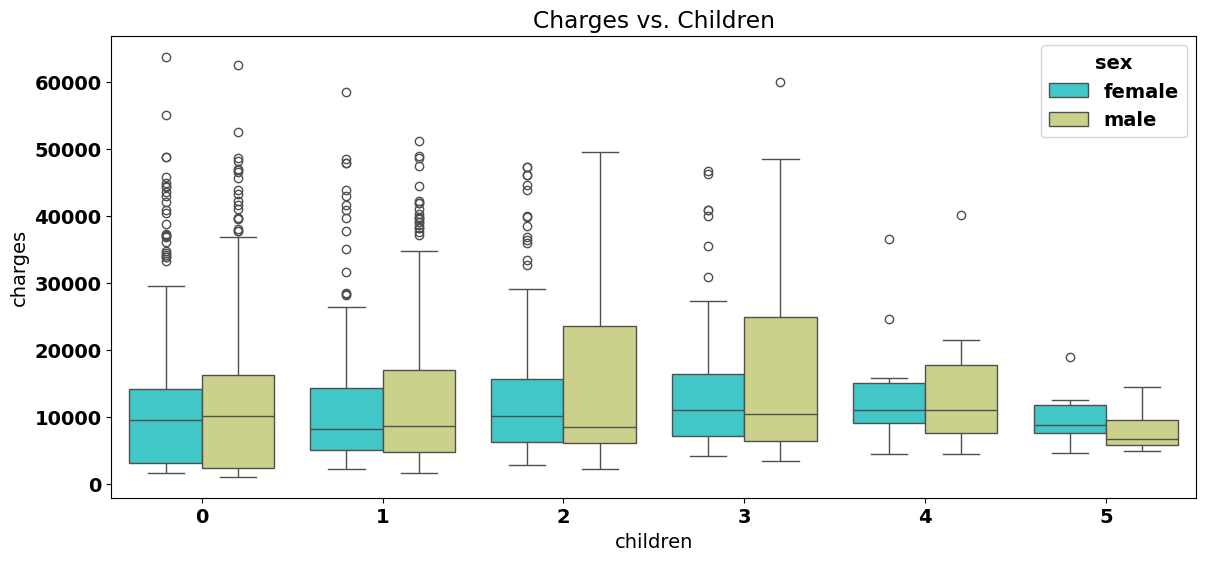

In [12]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges', hue='sex', data=df, palette='rainbow')
plt.title('Charges vs. Children')
plt.show()

## Use one-hot encoding to create dummy variables for the categorical data

In [13]:
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data=df, prefix='OHE', prefix_sep='_', columns=categorical_columns, drop_first=True, dtype='int8')

## Verify preprocessing

In [16]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


## Use box-cox transformation to normalize 'charges'/dependent variable

In [19]:
y_bc, lam, ci = boxcox(df_encode['charges'], alpha=.05)

ci,lam

((-0.011402906172929472, 0.09880968597671798),
 np.float64(0.043649061187374535))

## Log transform

In [20]:
df_encode['charges'] = np.log(df_encode['charges'])